In [47]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [49]:
df.drop_duplicates(inplace=True)

In [78]:
df['v1'].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

In [50]:
df['label']=df['v1'].map({'ham':'ham','spam':'spam'})

In [51]:
x=df['v2']

In [52]:
y=df['label']

C:\Users\saicharan\AppData\Local\Temp\ipykernel_9420\698129647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y, palette='Set2')


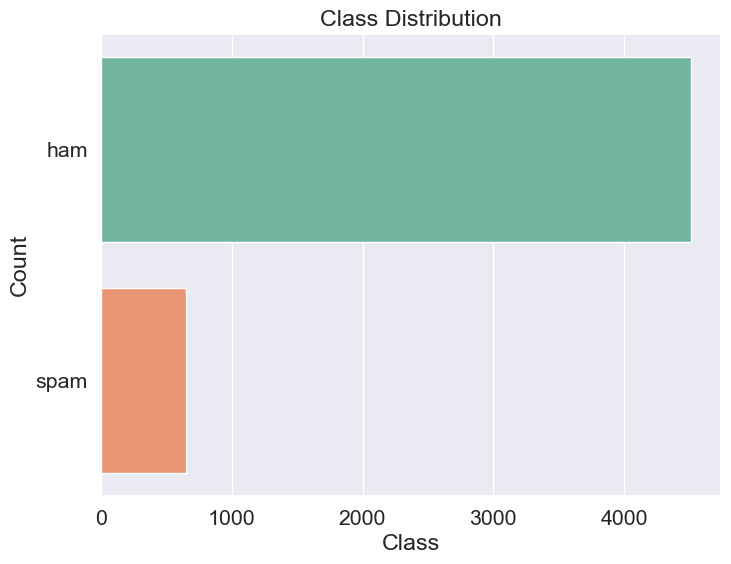

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(y, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
tfid_vec = TfidfVectorizer()

In [55]:
x_train_tfidf = tfid_vec.fit_transform(x_train)


In [56]:
classifier = MultinomialNB()


In [57]:
classifier.fit(x_train_tfidf, y_train)

MultinomialNB()

In [58]:
x_test_tfidf = tfid_vec.transform(x_test)

In [59]:
y_pred = classifier.predict(x_test_tfidf)

In [60]:
accuracy=accuracy_score(y_test,y_pred)

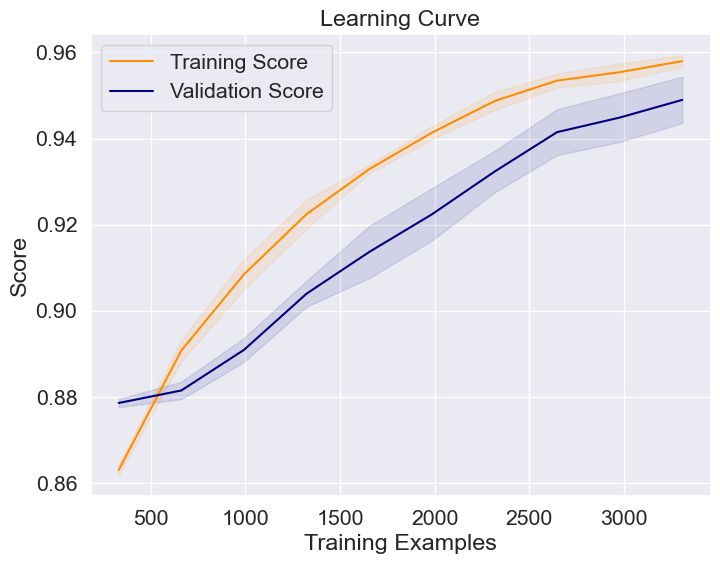

In [92]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, x_train_tfidf, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='darkorange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='darkorange')
plt.plot(train_sizes, test_mean, label='Validation Score', color='navy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='navy')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [61]:
report=classification_report(y_test,y_pred,target_names=['Legitimate SMS','Spam SMS'])

In [62]:
progress_bar=tqdm(total=100,position=0,leave=True)

progress :100: 100%|██████████| 100/100 [07:55<00:00,  4.76s/it]


In [63]:
for i in range(10,101,10):
    progress_bar.update(10)
    progress_bar.set_description(f'progress :{i}')

progress :100: 100%|██████████| 100/100 [00:00<00:00, 3858.78it/s]

In [64]:
print(f'accuraccy is {accuracy:.2f}')

accuraccy is 0.96


In [65]:
print(f'  {report}')

                  precision    recall  f1-score   support

Legitimate SMS       0.95      1.00      0.97       889
      Spam SMS       1.00      0.68      0.81       145

      accuracy                           0.96      1034
     macro avg       0.98      0.84      0.89      1034
  weighted avg       0.96      0.96      0.95      1034



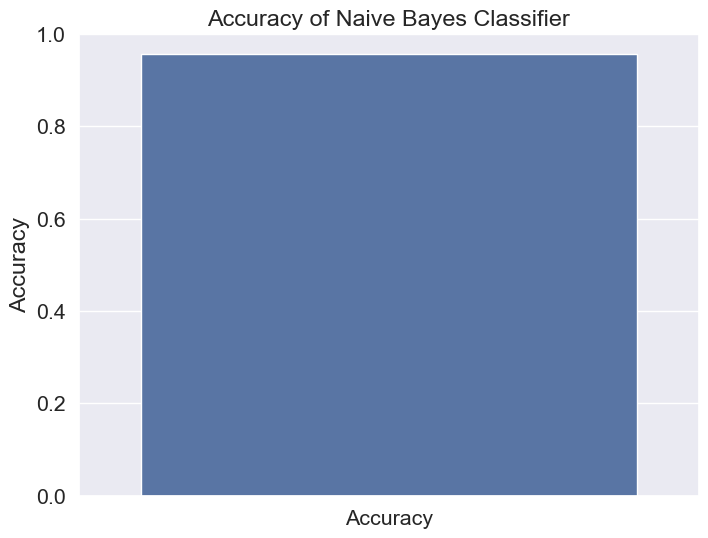

In [94]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Accuracy of Naive Bayes Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()



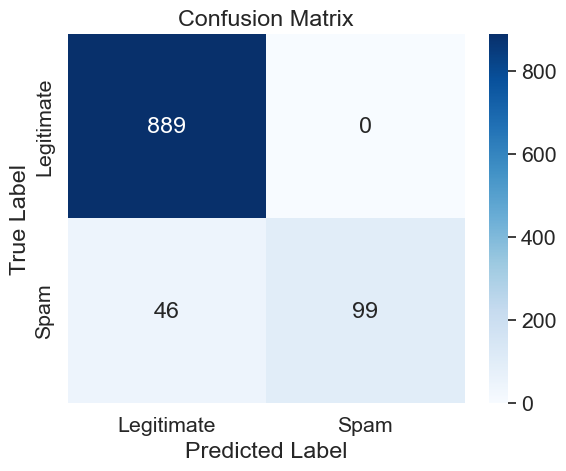

In [67]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.4)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Legitimate', 'Spam'], 
            yticklabels=['Legitimate', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
